# Importing and Cleaning Data Set

### Objective: To remove unnecessary columns and rows and transform the data set so that it can be used for data visualization and analysis

In [359]:
# Import libraries
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

In [387]:
# Import Data Set
reps = pd.read_csv('house_of_rep_election.csv')

In [388]:
# Check data set import
reps.head(5)

,year,state,state_po,state_fips,state_cen,state_ic,office,district,stage,runoff,special,candidate,party,writein,mode,candidatevotes,totalvotes,unofficial,version
0,1976,Alabama,AL,1,63,41,US House,1,gen,False,False,Bill Davenport,democrat,False,total,58906,157170,False,20200424
1,1976,Alabama,AL,1,63,41,US House,1,gen,False,False,Jack Edwards,republican,False,total,98257,157170,False,20200424
2,1976,Alabama,AL,1,63,41,US House,1,gen,False,False,NaN,NaN,True,total,7,157170,False,20200424
3,1976,Alabama,AL,1,63,41,US House,2,gen,False,False,J. Carole Keahey,democrat,False,total,66288,156362,False,20200424
4,1976,Alabama,AL,1,63,41,US House,2,gen,False,False,NaN,NaN,True,total,5,156362,False,20200424


In [389]:
# See what the breakdown of party looks like
reps['party'].value_counts()

democrat                   9062
republican                 8842
libertarian                2564
independent                1127
conservative                621
                           ... 
christian american            1
drug fighter                  1
the inclusion candidate       1
free peoples                  1
perot choice                  1
Name: party, Length: 430, dtype: int64

In [390]:
# Drop unnecessary columns
reps = reps.drop(columns=['state_fips', 'state_cen', 'state_ic', 'office', 'version', 'mode', 'candidate'])

In [391]:
# Calculate percent vote
reps['percent_vote'] = reps['candidatevotes']/reps['totalvotes']

In [392]:
# Function to transform decimal into a percent
def dec_to_perc(num):
    perc = num * 100
    perc_round = round(perc, 2)
    return perc_round

In [394]:
# Appy to percent_vote
reps['percent_vote'] = reps['percent_vote'].apply(dec_to_perc)

In [395]:
# Check bottom rows of data set
reps.tail(5)

,year,state,state_po,district,stage,runoff,special,party,writein,candidatevotes,totalvotes,unofficial,percent_vote
29631,2018,Maryland,MD,7,gen,NaN,False,NaN,True,272,264710,False,0.10
29632,2018,Maryland,MD,8,gen,NaN,False,democrat,False,217679,319330,False,68.17
29633,2018,Maryland,MD,8,gen,NaN,False,libertarian,False,4853,319330,False,1.52
29634,2018,Maryland,MD,8,gen,NaN,False,republican,False,96525,319330,False,30.23
29635,2018,Maryland,MD,8,gen,NaN,False,NaN,True,273,319330,False,0.09


In [396]:
# Filter data set to general elections and only democrat or republican and drop unnecessary columns
reps = reps[ reps['stage'] == 'gen']
reps = reps[ reps['party'].isin(['democrat', 'republican']) ]
reps = reps.drop(columns=['candidatevotes', 'totalvotes', 'stage'])

In [397]:
# Check bottom rows of data set
reps.tail(5)

,year,state,state_po,district,runoff,special,party,writein,unofficial,percent_vote
29624,2018,Maryland,MD,6,NaN,False,democrat,False,False,58.98
29629,2018,Maryland,MD,7,NaN,False,democrat,False,False,76.44
29630,2018,Maryland,MD,7,NaN,False,republican,False,False,21.26
29632,2018,Maryland,MD,8,NaN,False,democrat,False,False,68.17
29634,2018,Maryland,MD,8,NaN,False,republican,False,False,30.23


In [398]:
# Pivot table to prepare it for heat maps
reps_new = pd.pivot_table(reps, index = ['year', 'state', 'state_po', 'district'], columns = 'party', values = 'percent_vote')
reps_new = reps_new.reset_index()

In [399]:
# Check data
reps_new.tail(5)

party,year,state,state_po,district,democrat,republican
9542,2018,Wisconsin,WI,5,37.99,61.93
9543,2018,Wisconsin,WI,6,44.46,55.47
9544,2018,Wisconsin,WI,7,38.50,60.11
9545,2018,Wisconsin,WI,8,36.28,63.69
9546,2018,Wyoming,WY,0,29.77,63.59


In [403]:
def add_zero(str):
    if len(str) == 1:
        new_str = '0' + str
    else:
        new_str = str
    return new_str

In [404]:
reps_new['district'] = reps_new['district'].astype(str)
reps_new['district'] = reps_new['district'].apply(add_zero)
reps_new['rep_district'] = reps_new['state'] + "-" + reps_new['district']
reps_new = reps_new.fillna(0)

In [405]:
reps_new.head(5)

party,year,state,state_po,district,democrat,republican,rep_district
0,1976,Alabama,AL,01,37.48,62.52,Alabama-01
1,1976,Alabama,AL,02,42.39,57.60,Alabama-02
2,1976,Alabama,AL,03,98.97,0.00,Alabama-03
3,1976,Alabama,AL,04,80.38,19.62,Alabama-04
4,1976,Alabama,AL,05,99.99,0.00,Alabama-05


In [444]:
# Creating region specific data set because it was too big to look at all at once
pacific_northwest = reps_new[ reps_new['state_po'].isin(['WA', 'OR', 'ID']) ] 
california = reps_new[ reps_new['state_po'].isin(['CA']) ] 
rocky_mountains = reps_new[ reps_new['state_po'].isin(['MT', 'NV', 'CO', 'NE', 'UT', 'WY']) ] 
alaska_hawaii = reps_new[ reps_new['state_po'].isin(['AK', 'HI']) ] 
southwest = reps_new[ reps_new['state_po'].isin(['AZ', 'NM', 'OK', 'TX']) ] 
southeast = reps_new[ reps_new['state_po'].isin(['AL', 'AR', 'DE', 'FL', 'GA', 'KY', 'LA', 'MD', 'MS', 'NC', 'SC', 'TN', 'VA', 'WV']) ]
northeast = reps_new[ reps_new['state_po'].isin(['CT', 'NY', 'ME', 'MA', 'NH', 'NJ', 'PA', 'RI', 'VT']) ] 
midwest = reps_new[ reps_new['state_po'].isin(['IL', 'IN', 'IA', 'KS', 'MI', 'MN', 'MO', 'ND', 'OH', 'SD', 'WI']) ] 

In [445]:
# Pacific Northwest
republican_pn = pacific_northwest.pivot("rep_district", "year", "republican").fillna(0)
democrat_pn = pacific_northwest.pivot("rep_district", "year", "democrat").fillna(0)

# California 
republican_ca = california.pivot("rep_district", "year", "republican").fillna(0)
democrat_ca = california.pivot("rep_district", "year", "democrat").fillna(0)

# Rocky Mountains
republican_rm = rocky_mountains.pivot("rep_district", "year", "republican").fillna(0)
democrat_rm = rocky_mountains.pivot("rep_district", "year", "democrat").fillna(0)

# Alaska Hawaii
republican_ah = alaska_hawaii.pivot("rep_district", "year", "republican").fillna(0)
democrat_ah = alaska_hawaii.pivot("rep_district", "year", "democrat").fillna(0)

# Southwest
republican_sw = southwest.pivot("rep_district", "year", "republican").fillna(0)
democrat_sw = southwest.pivot("rep_district", "year", "democrat").fillna(0)

# Southeast
republican_se = southeast.pivot("rep_district", "year", "republican").fillna(0)
democrat_se = southeast.pivot("rep_district", "year", "democrat").fillna(0)

# Northeast
republican_ne = northeast.pivot("rep_district", "year", "republican").fillna(0)
democrat_ne = northeast.pivot("rep_district", "year", "democrat").fillna(0)

# Midwest
republican_mw = midwest.pivot("rep_district", "year", "republican").fillna(0)
democrat_mw = midwest.pivot("rep_district", "year", "democrat").fillna(0)

# Data Visualization

### Objective: To use heatmaps to better understand voting patterns over time

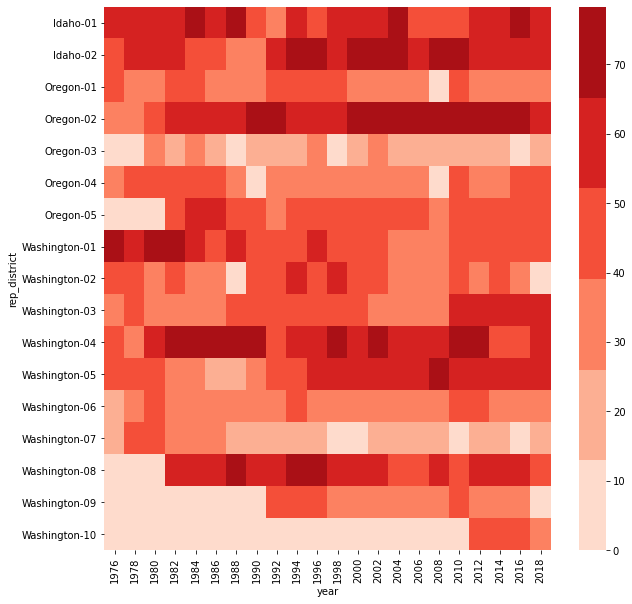

In [452]:
# Pacific Northwest Republicans
fig, ax = plt.subplots(figsize=(10,10)) 
pnr = sns.heatmap(republican_pn, ax=ax, cmap = sns.color_palette("Reds"))

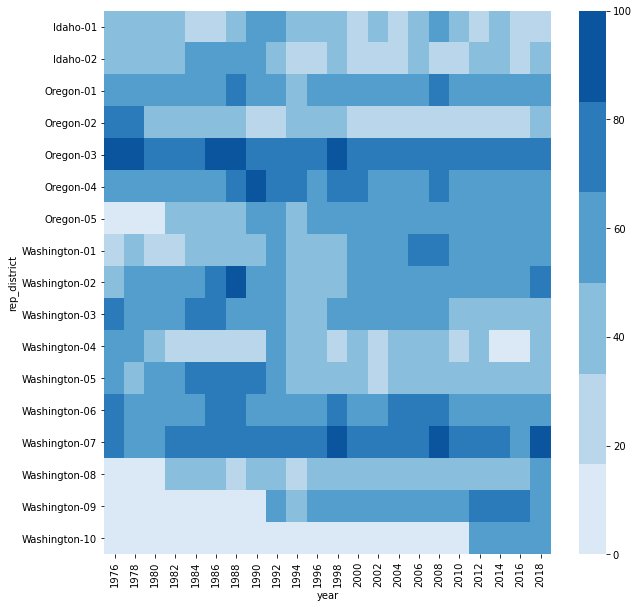

In [455]:
# Pacific Northwest Democrats
fig, ax = plt.subplots(figsize=(10,10)) 
pnd = sns.heatmap(democrat_pn, ax=ax, cmap = sns.color_palette("Blues"))

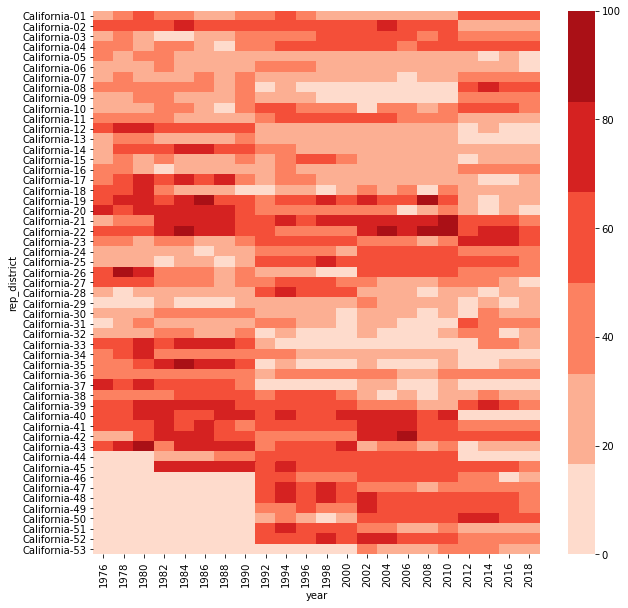

In [456]:
# California Republicans
fig, ax = plt.subplots(figsize=(10,10)) 
car = sns.heatmap(republican_ca, ax = ax, cmap = sns.color_palette("Reds"))

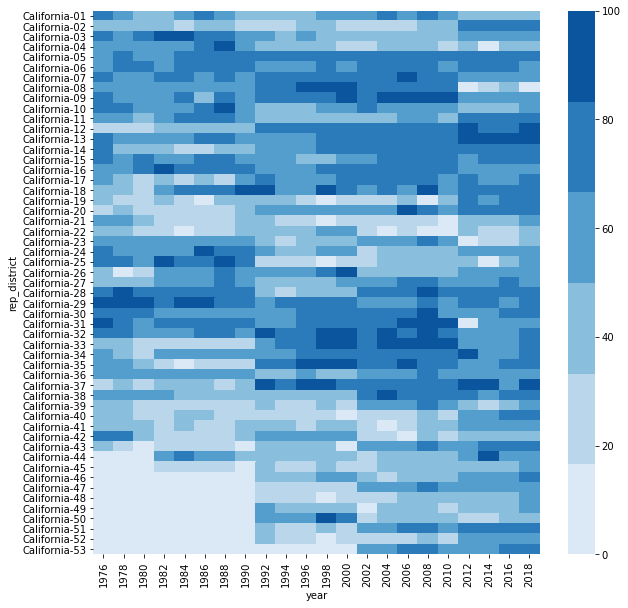

In [457]:
# California Democrats
fig, ax = plt.subplots(figsize=(10,10)) 
cad = sns.heatmap(democrat_ca, ax=ax, cmap = sns.color_palette("Blues"))

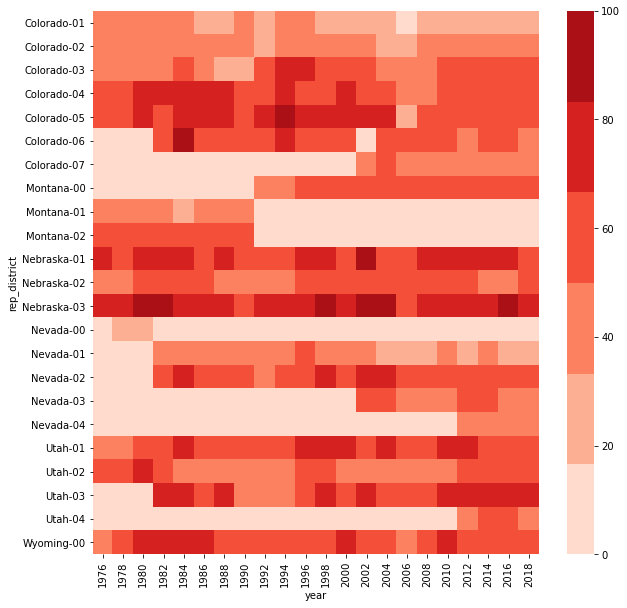

In [458]:
# Rocky Mountain Republicans
fig, ax = plt.subplots(figsize=(10,10)) 
rmr = sns.heatmap(republican_rm, ax=ax, cmap = sns.color_palette("Reds"))

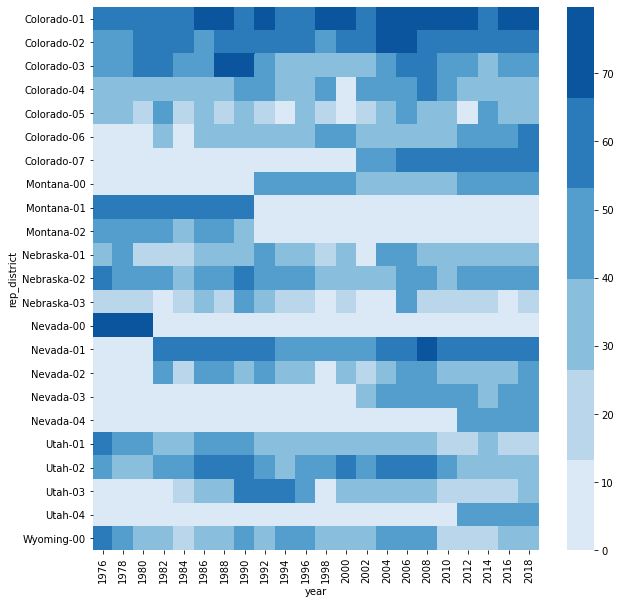

In [459]:
# Rocky Mountain Democrats
fig, ax = plt.subplots(figsize=(10,10)) 
rmd = sns.heatmap(democrat_rm, ax=ax, cmap = sns.color_palette("Blues"))

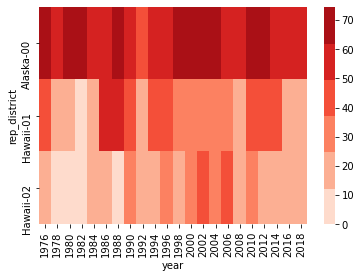

In [461]:
# Alaska Hawaii Republicans
ahr = sns.heatmap(republican_ah, cmap = sns.color_palette("Reds"))

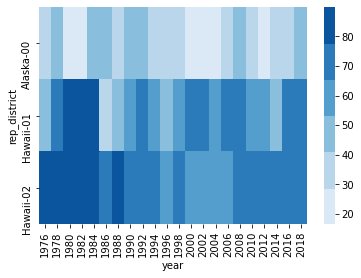

In [462]:
# Alaska Hawaii Democrats
ahd = sns.heatmap(democrat_ah, cmap = sns.color_palette("Blues"))

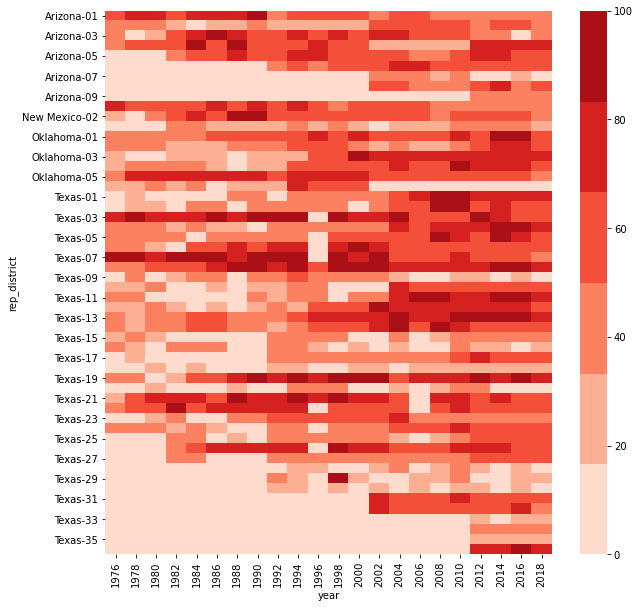

In [463]:
# Southwest Republicans
fig, ax = plt.subplots(figsize=(10,10)) 
swr = sns.heatmap(republican_sw, ax = ax, cmap = sns.color_palette("Reds"))

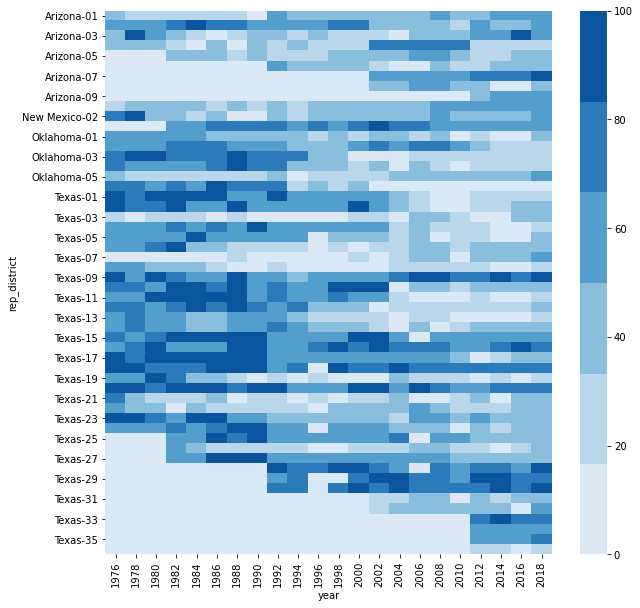

In [464]:
# Southwest Democrats
fig, ax = plt.subplots(figsize=(10,10)) 
swd = sns.heatmap(democrat_sw, ax=ax, cmap = sns.color_palette("Blues"))

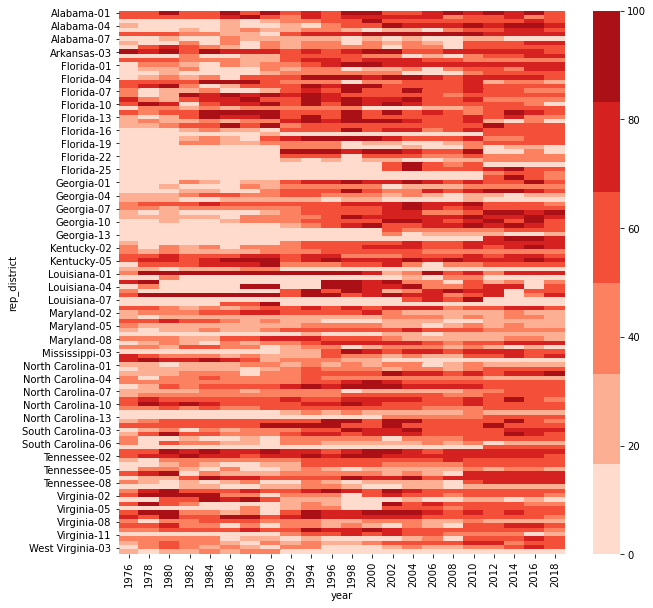

In [465]:
# Southeast Republicans
fig, ax = plt.subplots(figsize=(10,10)) 
ser = sns.heatmap(republican_se, ax=ax, cmap = sns.color_palette("Reds"))

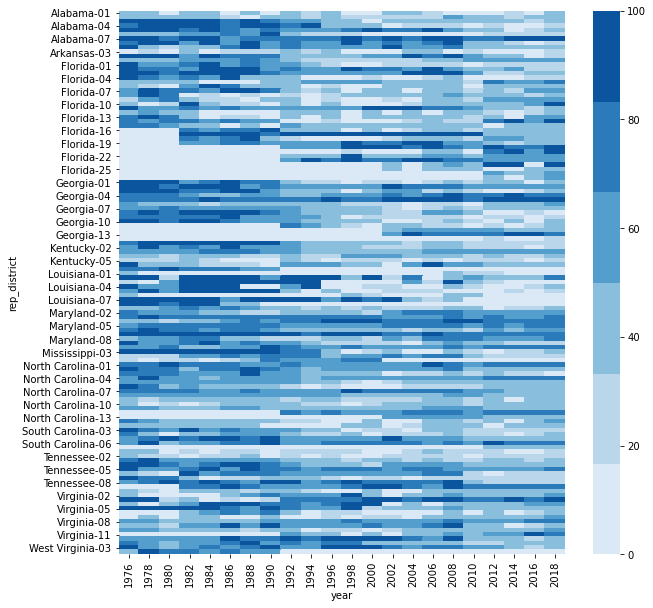

In [466]:
# Southeast Democrats
fig, ax = plt.subplots(figsize=(10,10)) 
sed = sns.heatmap(democrat_se, ax=ax, cmap = sns.color_palette("Blues"))

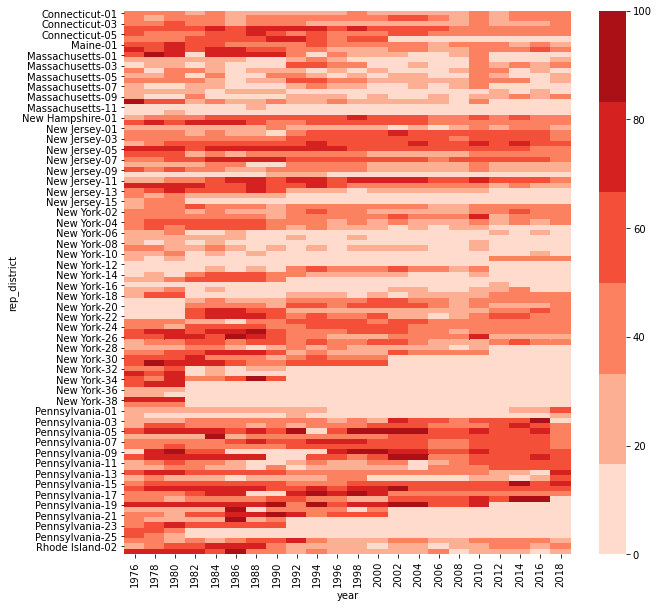

In [467]:
# Northeast Republicans
fig, ax = plt.subplots(figsize=(10,10)) 
ner = sns.heatmap(republican_ne, ax=ax, cmap = sns.color_palette("Reds"))

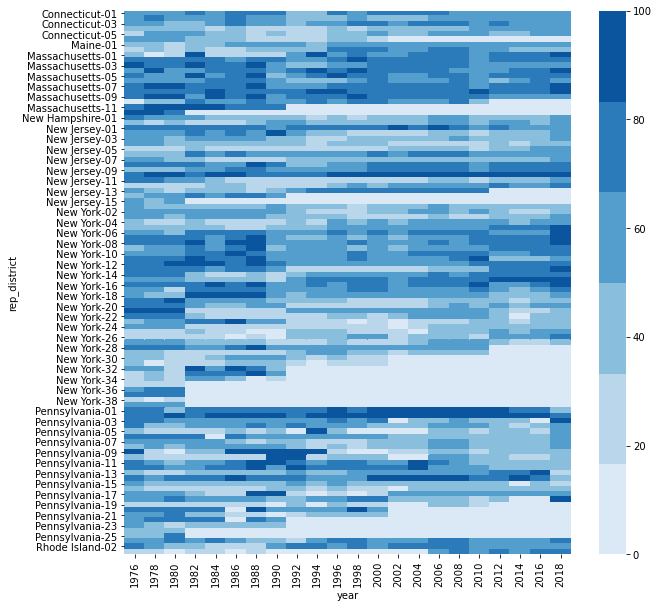

In [468]:
# Northeast Democrats
fig, ax = plt.subplots(figsize=(10,10)) 
ned = sns.heatmap(democrat_ne, ax=ax, cmap = sns.color_palette("Blues"))

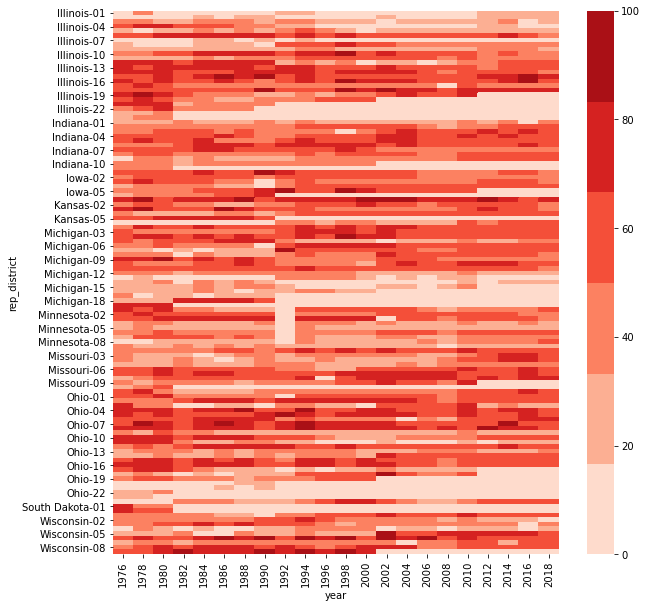

In [469]:
# Midwest Republicans
fig, ax = plt.subplots(figsize=(10,10)) 
mwr = sns.heatmap(republican_mw, ax=ax, cmap = sns.color_palette("Reds"))

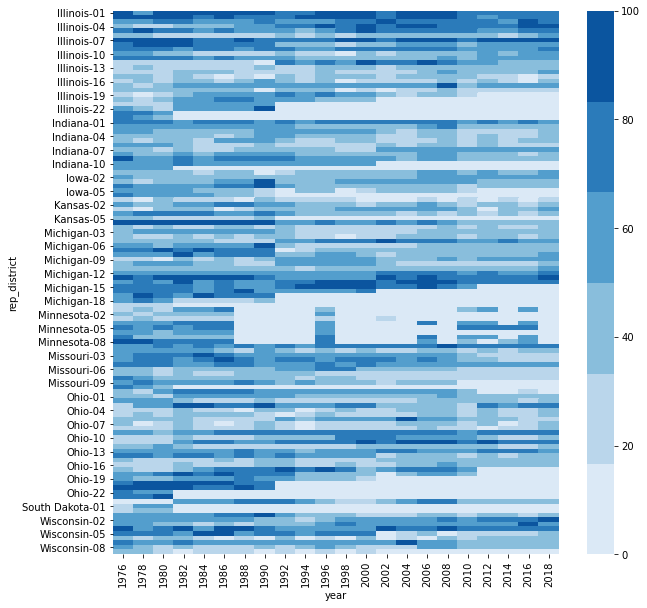

In [470]:
# Midwest Democrats
fig, ax = plt.subplots(figsize=(10,10)) 
mwd = sns.heatmap(democrat_mw, ax=ax, cmap = sns.color_palette("Blues"))

In [411]:
#Which election was the closest between democrats and republicans?
#What district had the biggest drop in % vote for Democrats between 1976 and 2018? Is it the same that had the biggest gain for Reps?
#What district had the biggest drop in % vote for Republicans between 1976 and 2018? Same as above
#What districts have had the most support for third party candidates?